##Approach-1
In this method i will not not be removing the duplicate entries rather **i would consider them as an independent datapoint at different time stamps and would remove the outliers from the dataset** further i would be apply various Machine Learning models on that dataset.

#Loading of dataset

In [44]:
import warnings
import itertools
#from pandas import datetime
#from pandas import read_csv
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="whitegrid")

In [45]:
import pandas as pd

file_path = '/content/drive/MyDrive/training dataset.csv'
df_train = pd.read_csv(file_path)


In [46]:
df_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [47]:
df_train= df_train.sort_values(by='Month of Sourcing', ascending=False)

In [48]:
df_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
275088,NTM3,X1,A28,DIRECT,Small,Powder,Sep-20,18.52
40093,NTM2,X1,A2,DIRECT,Large,Powder,Sep-20,164.91
425722,NTM2,X1,A36,DIRECT,Small,Powder,Sep-20,186.62
425717,NTM1,X2,A21,DIRECT,Small,Powder,Sep-20,74.75
258122,NTM1,X1,A3,DIRECT,Small,Powder,Sep-20,138.40
...,...,...,...,...,...,...,...,...
451708,NTM1,X1,A11,DIRECT,Large,Powder,Apr-21,141.22
451703,NTM3,X1,A14,DIRECT,Large,Liquid,Apr-21,0.00
451694,NTM2,X1,A3,DIRECT,Small,Powder,Apr-21,149.47
84363,NTM1,X1,A7,DIRECT,Large,Liquid,Apr-21,141.22


In [49]:
df_train.shape

(550176, 8)

In [50]:
df_test=pd.read_csv("/content/drive/MyDrive/test dataset.csv")
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32
95,NTM3,X3,A22,RETAIL,Large,Powder,Jun-21,40.73
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_test = df_test.dropna(how='all')
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


In [52]:
TrainTestCombined = pd.concat([df_train, df_test], ignore_index=True)
TrainTestCombined

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,DIRECT,Small,Powder,Sep-20,18.52
1,NTM2,X1,A2,DIRECT,Large,Powder,Sep-20,164.91
2,NTM2,X1,A36,DIRECT,Small,Powder,Sep-20,186.62
3,NTM1,X2,A21,DIRECT,Small,Powder,Sep-20,74.75
4,NTM1,X1,A3,DIRECT,Small,Powder,Sep-20,138.40
...,...,...,...,...,...,...,...,...
550267,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
550268,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
550269,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
550270,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


##Number of duplicate rows

In [53]:
duplicate_rows_train = df_train[df_train.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows_train = len(duplicate_rows_train)

print("Number of duplicate rows in training set:", num_duplicate_rows_train)

Number of duplicate rows in training set: 542796


In [54]:
duplicate_rows_test = df_test[df_test.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows_test = len(duplicate_rows_test)

print("Number of duplicate rows in testing set:", num_duplicate_rows_test)

Number of duplicate rows in testing set: 0


In [55]:
duplicate_rows = TrainTestCombined[TrainTestCombined.duplicated()]

# Get the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

print("Number of duplicate rows in combined dataset:", num_duplicate_rows)

Number of duplicate rows in combined dataset: 542796


In [56]:
duplicate_rows

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
19,NTM1,X1,A33,DIRECT,Large,Powder,Sep-20,133.30
34,NTM3,X1,A28,DIRECT,Small,Powder,Sep-20,18.52
36,NTM3,X1,A14,DIRECT,Large,Liquid,Sep-20,0.00
46,NTM1,X1,A33,DIRECT,Large,Powder,Sep-20,133.30
50,NTM2,X1,A28,DIRECT,Large,Powder,Sep-20,196.98
...,...,...,...,...,...,...,...,...
550171,NTM1,X1,A11,DIRECT,Large,Powder,Apr-21,141.22
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Apr-21,0.00
550173,NTM2,X1,A3,DIRECT,Small,Powder,Apr-21,149.47
550174,NTM1,X1,A7,DIRECT,Large,Liquid,Apr-21,141.22


In [57]:
df=df_train.copy()

##Number of null values

In [58]:
null_summary = df.isnull().sum()
null_summary

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550176 entries, 275088 to 189612
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 37.8+ MB


##Describing the dataset

In [60]:
df.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


##Number of rows where the **Sourcing Cost** is Zero

In [61]:
df[df["Sourcing Cost"]==0].count()

ProductType          15592
Manufacturer         15592
Area Code            15592
Sourcing Channel     15592
Product Size         15592
Product Type         15592
Month of Sourcing    15592
Sourcing Cost        15592
dtype: int64

##Number of rows where the Sourcing Cost is Negative

In [62]:
negative_entries = df[df['Sourcing Cost'] < 0]

print("Number of rows with negative sourcing cost:", len(negative_entries))

Number of rows with negative sourcing cost: 184


##Categorical columns

In [63]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for col in categorical_columns:
    print(col)

Categorical Columns:
ProductType
Manufacturer
Area Code
Sourcing Channel
Product Size
Product Type
Month of Sourcing


##Unique entries in each categorical column

In [64]:
for col in categorical_columns:
    unique_entries = df[col].nunique()
    print(f"Number of unique entries in {col}: {unique_entries}")

Number of unique entries in ProductType: 3
Number of unique entries in Manufacturer: 3
Number of unique entries in Area Code: 45
Number of unique entries in Sourcing Channel: 4
Number of unique entries in Product Size: 3
Number of unique entries in Product Type: 2
Number of unique entries in Month of Sourcing: 11


##Outlier Detection

In [65]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Sourcing Cost'], dtype='object')

## Based on Inter-Quartile Range

In [66]:
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame named 'df'

# Function to detect outliers using the Interquartile Range (IQR) method
def detect_outliers_iqr(column):
    # Calculate the first and third quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a boolean mask indicating outliers
    return (column < lower_bound) | (column > upper_bound)

# Apply outlier detection to numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns
outliers_mask = df[numeric_columns].apply(detect_outliers_iqr)

# Display the rows containing outliers
outliers = df[outliers_mask.any(axis=1)]
print("Rows containing outliers:")
print(outliers)


Rows containing outliers:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
262161        NTM2           X1       A23           RETAIL        Large   
459402        NTM2           X1       A23           RETAIL        Large   
219620        NTM2           X1       A23           RETAIL        Large   
57831         NTM2           X1       A37           DIRECT        Small   
544244        NTM2           X1       A23           RETAIL        Large   
...            ...          ...       ...              ...          ...   
454279        NTM2           X1       A16           DIRECT        Small   
84238         NTM3           X1       A35           DIRECT        Small   
288530        NTM2           X1       A38           DIRECT        Small   
84416         NTM2           X1       A38           RETAIL        Large   
451411        NTM2           X1       A28           DIRECT        Large   

       Product Type Month of Sourcing  Sourcing Cost  
262161       Powde

##Removing the outliers

In [67]:
# Drop the rows containing outliers
cleaned_df = df[~outliers_mask.any(axis=1)]

# Display information about the removed outliers
print("Number of outliers removed:", outliers.shape[0])

# Display the cleaned DataFrame
print("DataFrame after removing outliers:")
print(cleaned_df)

Number of outliers removed: 2666
DataFrame after removing outliers:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
275088        NTM3           X1       A28           DIRECT        Small   
40093         NTM2           X1        A2           DIRECT        Large   
425722        NTM2           X1       A36           DIRECT        Small   
425717        NTM1           X2       A21           DIRECT        Small   
258122        NTM1           X1        A3           DIRECT        Small   
...            ...          ...       ...              ...          ...   
451708        NTM1           X1       A11           DIRECT        Large   
451703        NTM3           X1       A14           DIRECT        Large   
451694        NTM2           X1        A3           DIRECT        Small   
84363         NTM1           X1        A7           DIRECT        Large   
189612        NTM2           X1       A10           DIRECT        Small   

       Product Type Month of So

In [68]:
df=cleaned_df
len(df)

547510

##Based on Z-score Method

In [69]:
from scipy import stats

# Function to detect outliers using Z-score
def detect_outliers_zscore(column, threshold=3):
    z_scores = stats.zscore(column)
    return abs(z_scores) > threshold

# Apply outlier detection to numeric columns in the DataFrame
outliers_mask = df[numeric_columns].apply(detect_outliers_zscore)
outliers = df[outliers_mask.any(axis=1)]
print("Rows containing outliers:")
print(len(outliers))



Rows containing outliers:
24


##Based on Isolation Forest

In [70]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination parameter as needed

# Fit the model to the data and predict outliers
model.fit(df[numeric_columns])
outliers_mask = model.predict(df[numeric_columns]) == -1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


##Distribution of Sourcing Cost

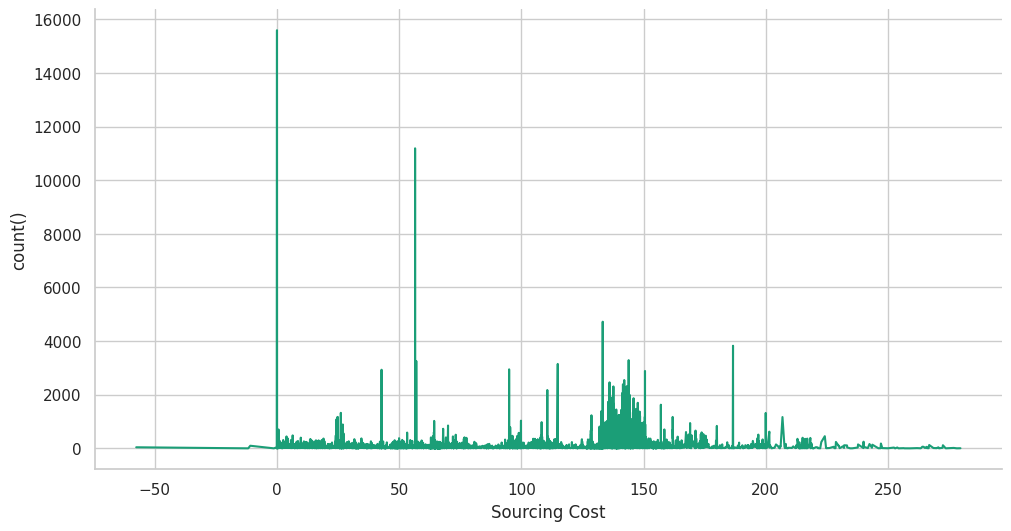

In [72]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Sourcing Cost']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Sourcing Cost'}, axis=1)
              .sort_values('Sourcing Cost', ascending=True))
  xs = counted['Sourcing Cost']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Sourcing Cost', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sourcing Cost')
_ = plt.ylabel('count()')

##Histogram for all categorical variables

In [73]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=len(categorical_columns), cols=1, shared_xaxes=True, subplot_titles=categorical_columns)

# Loop through each categorical column and add a histogram trace to the subplot
for i, col in enumerate(categorical_columns, start=1):
    # Count the frequency of each unique value in the column
    value_counts = df[col].value_counts()

    # Create a histogram trace
    trace = go.Bar(
        x=value_counts.index,
        y=value_counts.values,
        name=col
    )

    # Add the histogram trace to the subplot
    fig.add_trace(trace, row=i, col=1)

# Update layout properties
fig.update_layout(
    height=800,  # Adjust the height of the subplot if needed
    showlegend=False,
    title_text="Histograms of Categorical Columns",
)

# Update x-axis and y-axis titles
fig.update_xaxes(title_text="Unique Values", row=len(categorical_columns), col=1)
fig.update_yaxes(title_text="Frequency", row=len(categorical_columns), col=1)

# Show the subplot
fig.show()

##Number of different Product Sizes for each Sourcing Channel

<Axes: xlabel='Sourcing Channel'>

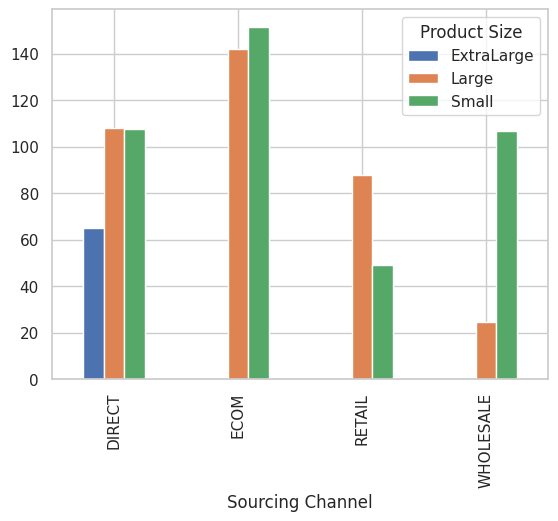

In [77]:
df.groupby(['Sourcing Channel', 'Product Size'])['Sourcing Cost'].mean().unstack().plot(kind='bar')

## Distribution of Sourcing Cost with Month of Sourcing based on Product Type

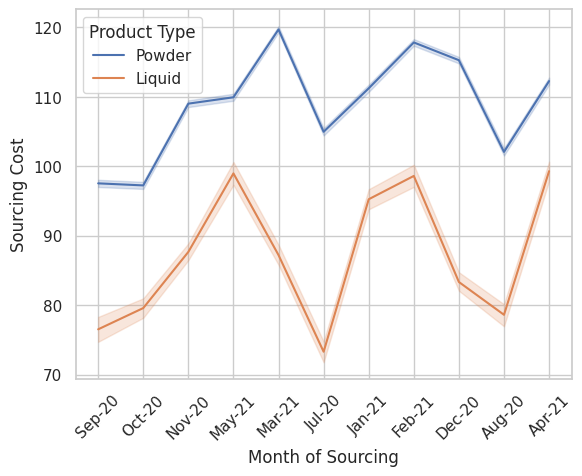

In [244]:
import matplotlib.pyplot as plt
sns.lineplot(data=df, x="Month of Sourcing", y="Sourcing Cost", hue="Product Type")
plt.xlabel("Month of Sourcing")
plt.xticks(rotation=45)
_ = plt.ylabel("Sourcing Cost")


##Distribution of Sourcing Cost over Time

In [248]:
import pandas as pd
import plotly.express as px

# Assuming your dataset is stored in a pandas DataFrame named 'df'
# Assuming 'Month of Sourcing' column is already in datetime format
df_datetime=df.copy()

df_datetime['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')
# Group the data by month of sourcing and calculate the mean sourcing cost for each month
monthly_aggregated = df_datetime.groupby(pd.Grouper(key='Month of Sourcing', freq='M')).agg({'Sourcing Cost': 'mean'}).reset_index()

# Create an interactive line chart for the aggregated data
fig = px.line(monthly_aggregated, x='Month of Sourcing', y='Sourcing Cost',
              title='Mean Sourcing Cost Over Time',
              labels={'Month of Sourcing': 'Month of Sourcing', 'sourcing_cost': 'Mean Sourcing Cost'})

# Show the interactive line chart
fig.show()


##Distribution of Sourcing Cost over time for Product Type

In [249]:
import pandas as pd
import plotly.express as px

# Aggregate by 'Month of Sourcing' and 'Product Type' to get the total sourcing cost for each product type per month
agg_df = df_datetime.groupby(['Month of Sourcing', 'ProductType'])['Sourcing Cost'].sum().reset_index()

# Plot interactive line chart
fig = px.line(agg_df, x='Month of Sourcing', y='Sourcing Cost', color='ProductType', title='Sourcing Cost by Product Type Over Time')
fig.show()


##Plot for Time Difference

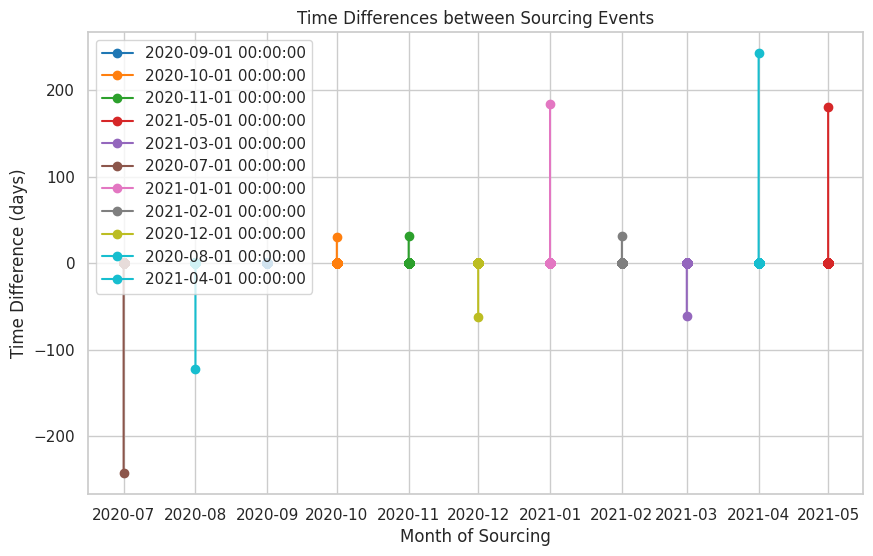

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is stored in a pandas DataFrame named 'df'
# Assuming 'Month of Sourcing' column is already in datetime format
df_copy=df.copy()
# Calculate time differences between sourcing events
df_copy['Month of Sourcing'] = pd.to_datetime(df_copy['Month of Sourcing'], format='%b-%y')

df_copy['time_diff'] = df_copy['Month of Sourcing'].diff().dt.days

# Identify peak sourcing periods
# You can define your time intervals for peak sourcing periods (e.g., monthly, quarterly, yearly)
peak_periods = df_copy.resample('M', on='Month of Sourcing').size()

# Detect time-related trends or anomalies
# Visualize sourcing patterns over time
plt.figure(figsize=(10, 6))

# Get unique values of 'Month of Sourcing'
unique_months = df_copy['Month of Sourcing'].unique()

# Generate a color map with a different color for each unique month
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_months)))

# Plot each unique month with a different color
for i, month in enumerate(unique_months):
    # Filter data for the current month
    month_data = df_copy[df_copy['Month of Sourcing'] == month]
    plt.plot(month_data['Month of Sourcing'], month_data['time_diff'], marker='o', linestyle='-', color=colors[i], label=str(month))

plt.title('Time Differences between Sourcing Events')
plt.xlabel('Month of Sourcing')
plt.ylabel('Time Difference (days)')
plt.grid(True)
plt.legend()
plt.show()


#Preprocessing






In [287]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
275088,NTM3,X1,A28,DIRECT,Small,Powder,Sep-20,18.52
40093,NTM2,X1,A2,DIRECT,Large,Powder,Sep-20,164.91
425722,NTM2,X1,A36,DIRECT,Small,Powder,Sep-20,186.62
425717,NTM1,X2,A21,DIRECT,Small,Powder,Sep-20,74.75
258122,NTM1,X1,A3,DIRECT,Small,Powder,Sep-20,138.40


In [288]:
df_training =df.copy()

In [289]:
df_testing=df_test.copy()

##Label Encoding for Categorical Columns

In [290]:
from sklearn.preprocessing import LabelEncoder
def label_encode_categorical_columns(df, categorical_columns):
    # Make a copy of the DataFrame to avoid modifying the original
    df_encoded = df.copy()

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate over each categorical column and perform label encoding
    for col in categorical_columns:
        # Fit label encoder and transform the column
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

    return df_encoded

##Normalizing Numeric Input

In [291]:
from sklearn.preprocessing import MinMaxScaler
def Normalize_column(df, numeric_columns):
    scaler = MinMaxScaler()
    # Fit and transform the scaler on the numerical columns
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

In [292]:
df_training=label_encode_categorical_columns(df_training,categorical_columns)
df_testing=label_encode_categorical_columns(df_testing,categorical_columns)

In [293]:
df_training.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
275088,2,0,19,0,2,1,10,18.52
40093,1,0,11,0,1,1,10,164.91
425722,1,0,28,0,2,1,10,186.62
425717,0,1,13,0,2,1,10,74.75
258122,0,0,21,0,2,1,10,138.40


In [294]:
df_testing.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,0,103.68
1,0,0,1,0,1,1,0,155.75
2,0,0,1,1,1,1,0,143.02
3,0,0,2,0,1,1,0,139.39
4,0,0,11,0,1,1,0,169.42


In [295]:
df_training= Normalize_column(df_training, numeric_columns)
df_testing= Normalize_column(df_testing, numeric_columns)

In [296]:
df_training.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
275088,2,0,19,0,2,1,10,0.225681
40093,1,0,11,0,1,1,10,0.659699
425722,1,0,28,0,2,1,10,0.724065
425717,0,1,13,0,2,1,10,0.392392
258122,0,0,21,0,2,1,10,0.581102


In [297]:
df_testing.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,0,0.431713
1,0,0,1,0,1,1,0,0.657544
2,0,0,1,1,1,1,0,0.602333
3,0,0,2,0,1,1,0,0.586590
4,0,0,11,0,1,1,0,0.716832


##Traditional Machine Learning

In [298]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming your preprocessed dataset is stored in a pandas DataFrame named 'df'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_training.drop(["Sourcing Cost"],axis=1), df_training["Sourcing Cost"], test_size=0.2, random_state=42)



##Applying Linear Regression, Decision Tree, Random Forest and Xgboost Models on the dataset

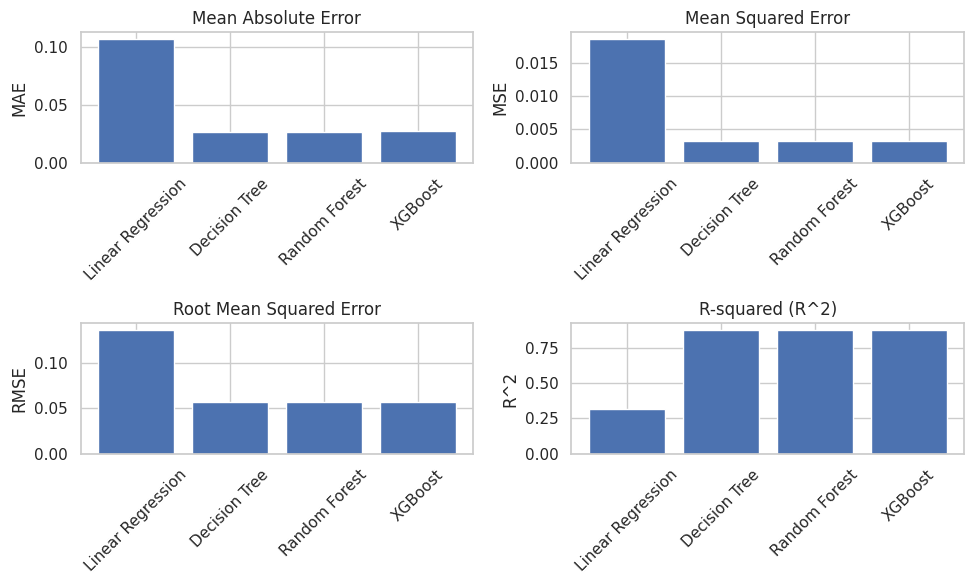

In [299]:
# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()

# Fit models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Make predictions
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test)

# Calculate error metrics
def calculate_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_linear_reg, mse_linear_reg, rmse_linear_reg, r2_linear_reg = calculate_error_metrics(y_test, y_pred_linear_reg)
mae_decision_tree, mse_decision_tree, rmse_decision_tree, r2_decision_tree = calculate_error_metrics(y_test, y_pred_decision_tree)
mae_random_forest, mse_random_forest, rmse_random_forest, r2_random_forest = calculate_error_metrics(y_test, y_pred_random_forest)
mae_xgboost, mse_xgboost, rmse_xgboost, r2_xgboost = calculate_error_metrics(y_test, y_pred_xgboost)

# Plot evaluation metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_values = [mae_linear_reg, mae_decision_tree, mae_random_forest, mae_xgboost]
mse_values = [mse_linear_reg, mse_decision_tree, mse_random_forest, mse_xgboost]
rmse_values = [rmse_linear_reg, rmse_decision_tree, rmse_random_forest, rmse_xgboost]
r2_values = [r2_linear_reg, r2_decision_tree, r2_random_forest, r2_xgboost]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, mae_values)
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(models, mse_values)
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(models, rmse_values)
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(models, r2_values)
plt.title('R-squared (R^2)')
plt.ylabel('R^2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [300]:
r2_values

[0.3188561161285478, 0.8810377511634193, 0.881026677313897, 0.8799481029320713]

##On Testing Dataset

In [301]:
df_testing_1=df_testing.drop(["Sourcing Cost"],axis=1)
df_testing_1["Month of Sourcing"]=11
df_testing_1.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
0,0,0,0,0,2,1,11
1,0,0,1,0,1,1,11
2,0,0,1,1,1,1,11
3,0,0,2,0,1,1,11
4,0,0,11,0,1,1,11


In [302]:
y_test_pred_random_forest = random_forest.predict(df_testing_1)

In [303]:
y_true=df_testing["Sourcing Cost"]
y_true

0     0.431713
1     0.657544
2     0.602333
3     0.586590
4     0.716832
        ...   
91    0.370517
92    0.478943
93    0.464588
94    0.122219
95    0.158694
Name: Sourcing Cost, Length: 96, dtype: float64

In [304]:
r2 = r2_score(y_true, y_test_pred_random_forest)
r2

0.5553451128812854

##Deep Learning Models

In [146]:
df_training.drop(columns=['Sourcing Cost'])

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
275088,2,0,19,0,2,1,10
40093,1,0,11,0,1,1,10
425722,1,0,28,0,2,1,10
425717,0,1,13,0,2,1,10
258122,0,0,21,0,2,1,10
...,...,...,...,...,...,...,...
451708,0,0,2,0,1,1,0
451703,2,0,5,0,1,0,0
451694,1,0,21,0,2,1,0
84363,0,0,42,0,1,0,0


##Spliting the Dataset into Training and Test Dataset

In [147]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data
X = df_training.drop(columns=['Sourcing Cost']).values  # Input features (all columns except 'Sourcing Cost')
y = df_training['Sourcing Cost'].values  # Target variable

# Reshape input features for LSTM (assuming a single time step)
# The reshape is necessary for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [148]:
X_train.shape

(438008, 1, 7)

##LSTM

In [150]:
lstm_model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train model
lstm_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Evaluate model
loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

Epoch 1/25
13688/13688 [==============================] - 44s 3ms/step - loss: 0.0105
Epoch 2/25
13688/13688 [==============================] - 43s 3ms/step - loss: 0.0086
Epoch 3/25
13688/13688 [==============================] - 35s 3ms/step - loss: 0.0080
Epoch 4/25
13688/13688 [==============================] - 35s 3ms/step - loss: 0.0075
Epoch 5/25
13688/13688 [==============================] - 36s 3ms/step - loss: 0.0071
Epoch 6/25
13688/13688 [==============================] - 35s 3ms/step - loss: 0.0067
Epoch 7/25
13688/13688 [==============================] - 37s 3ms/step - loss: 0.0063
Epoch 8/25
13688/13688 [==============================] - 41s 3ms/step - loss: 0.0059
Epoch 9/25
13688/13688 [==============================] - 45s 3ms/step - loss: 0.0056
Epoch 10/25
13688/13688 [==============================] - 35s 3ms/step - loss: 0.0053
Epoch 11/25
13688/13688 [==============================] - 44s 3ms/step - loss: 0.0050
Epoch 12/25
13688/13688 [===========================

In [151]:
model_file_path = 'lstm_model.h5'

# Save the model
lstm_model.save(model_file_path)

print("LSTM model saved successfully at:", model_file_path)

LSTM model saved successfully at: lstm_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



3422/3422 [==============================] - 7s 2ms/step


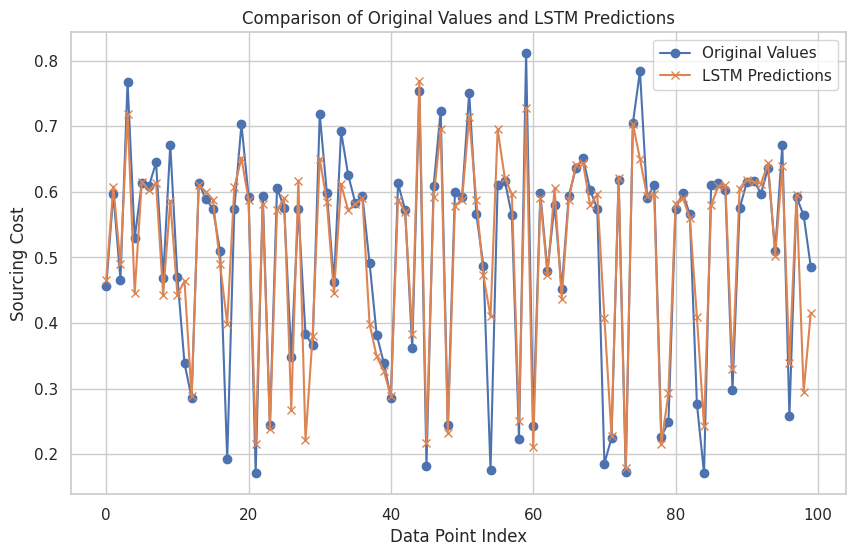

In [152]:
import matplotlib.pyplot as plt

# Make predictions using the trained LSTM model
y_pred = lstm_model.predict(X_test)

# Extract the first 100 data points from the original dataset and LSTM predictions
original_values = y_test[:100]  # Original values
predicted_values = y_pred[:100]  # LSTM predictions

# Plot the original values and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(original_values, label='Original Values', marker='o')
plt.plot(predicted_values, label='LSTM Predictions', marker='x')
plt.title('Comparison of Original Values and LSTM Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
r2 = r2_score(original_values, predicted_values)
r2

0.8512758598343642

##Bi-Directional LSTM

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

In [155]:
Bilstm_model = Sequential([
    Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(1)
])

Bilstm_model.compile(optimizer='adam', loss='mse')

# Train model
Bilstm_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Evaluate model
loss = Bilstm_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')


Epoch 1/25
13688/13688 [==============================] - 79s 5ms/step - loss: 0.0099
Epoch 2/25
13688/13688 [==============================] - 70s 5ms/step - loss: 0.0077
Epoch 3/25
13688/13688 [==============================] - 76s 6ms/step - loss: 0.0055
Epoch 4/25
13688/13688 [==============================] - 72s 5ms/step - loss: 0.0045
Epoch 5/25
13688/13688 [==============================] - 76s 6ms/step - loss: 0.0042
Epoch 6/25
13688/13688 [==============================] - 73s 5ms/step - loss: 0.0040
Epoch 7/25
13688/13688 [==============================] - 71s 5ms/step - loss: 0.0040
Epoch 8/25
13688/13688 [==============================] - 75s 6ms/step - loss: 0.0039
Epoch 9/25
13688/13688 [==============================] - 70s 5ms/step - loss: 0.0038
Epoch 10/25
13688/13688 [==============================] - 74s 5ms/step - loss: 0.0037
Epoch 11/25
13688/13688 [==============================] - 73s 5ms/step - loss: 0.0037
Epoch 12/25
13688/13688 [===========================

In [156]:
model_file_path = 'Bilstm_model.h5'

# Save the model
Bilstm_model.save(model_file_path)

print("BiLSTM model saved successfully at:", model_file_path)

BiLSTM model saved successfully at: Bilstm_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



3422/3422 [==============================] - 10s 3ms/step


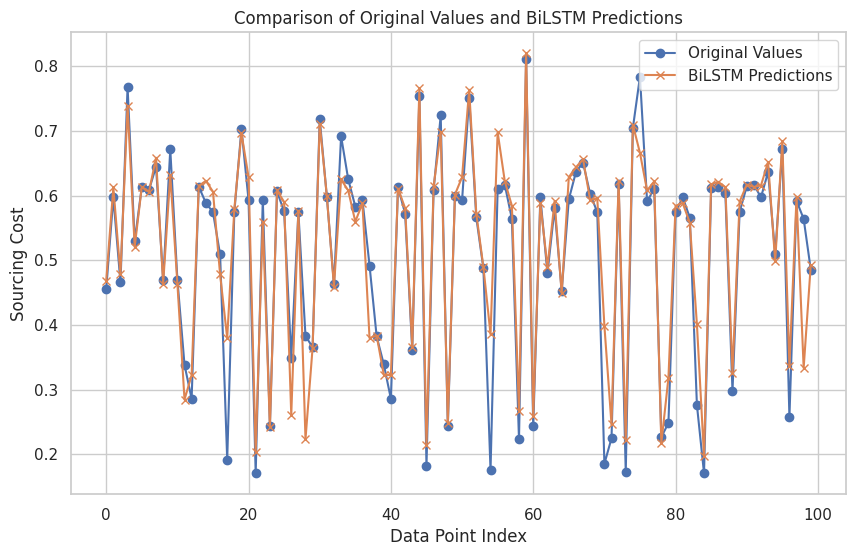

In [157]:
import matplotlib.pyplot as plt

# Make predictions using the trained LSTM model
y_pred = Bilstm_model.predict(X_test)

# Extract the first 100 data points from the original dataset and LSTM predictions
original_values = y_test[:100]  # Original values
predicted_values = y_pred[:100]  # LSTM predictions

# Plot the original values and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(original_values, label='Original Values', marker='o')
plt.plot(predicted_values, label='BiLSTM Predictions', marker='x')
plt.title('Comparison of Original Values and BiLSTM Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()


In [158]:
r2_bilstm = r2_score(original_values, predicted_values)
r2_bilstm

0.8873316638123204

##Attention BiLSTM

In [199]:
!pip install keras-self-attention

In [205]:
# Convert DataFrame to a NumPy array
array = X_train.to_numpy()

# Reshape the array to (438008, 1, 7)
array_reshaped = array.reshape(-1, 1, 7)

print("Reshaped Array Shape:", array_reshaped.shape)

Reshaped Array Shape: (438008, 1, 7)


In [206]:
x_train=array_reshaped

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, TimeDistributed, Dense
from keras_self_attention import SeqSelfAttention
import tensorflow as tf

# Define the model architecture
def create_attention_BiLSTM(input_shape, output_dim):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=64,
                                 return_sequences=True,
                                 kernel_initializer='uniform',
                                 activation='tanh'), input_shape=input_shape))
    model.add(SeqSelfAttention(attention_activation='linear'))
    model.add(TimeDistributed(Dense(units=output_dim, activation=None)))

    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(loss='mse', optimizer=opt)
    return model

# Define input shape and output dimension
input_shape = (1,7)  # Shape of each sample in X_train
output_dim = 1  # Output dimension

# Create the model
model = create_attention_BiLSTM(input_shape, output_dim)

# Train the model
# Assuming X_train and y_train are your training data
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.1)



Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning:

The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.



12319/12319 [==============================] - 67s 5ms/step - loss: 0.0121 - val_loss: 0.0105
Epoch 2/25
12319/12319 [==============================] - 61s 5ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 3/25
12319/12319 [==============================] - 52s 4ms/step - loss: 0.0085 - val_loss: 0.0094
Epoch 4/25
12319/12319 [==============================] - 60s 5ms/step - loss: 0.0081 - val_loss: 0.0084
Epoch 5/25
12319/12319 [==============================] - 55s 4ms/step - loss: 0.0079 - val_loss: 0.0081
Epoch 6/25
12319/12319 [==============================] - 52s 4ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 7/25
12319/12319 [==============================] - 55s 4ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 8/25
12319/12319 [==============================] - 52s 4ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 9/25
12319/12319 [==============================] - 52s 4ms/step - loss: 0.0069 - val_loss: 0.0071
Epoch 10/25
12319/12319 [==============================] - 51s 4ms

In [218]:
# Convert DataFrame to a NumPy array
array = X_test.to_numpy()

# Reshape the array to (438008, 1, 7)
array_reshaped = array.reshape(-1, 1, 7)

print("Reshaped Array Shape:", array_reshaped.shape)

Reshaped Array Shape: (109502, 1, 7)


In [219]:
x_test=array_reshaped

In [220]:
import matplotlib.pyplot as plt

# Make predictions using the trained LSTM model
y_pred = model.predict(x_test)

# Extract the first 100 data points from the original dataset and LSTM predictions
original_values = y_test[:100]  # Original values
predicted_values = y_pred[:100]  # LSTM predictions



3422/3422 [==============================] - 7s 2ms/step


In [221]:
predicted_values=predicted_values.squeeze()

In [225]:
predicted_values.shape

(100,)

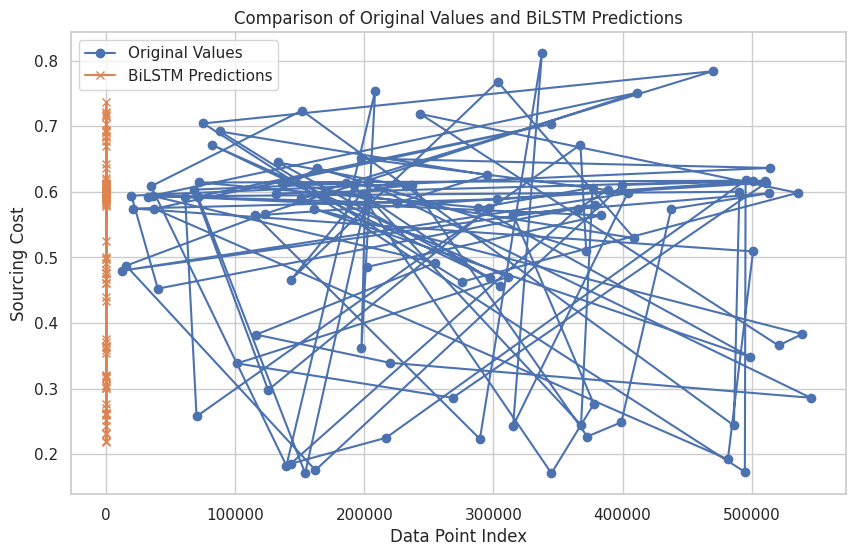

In [226]:
plt.figure(figsize=(10, 6))
plt.plot(original_values, label='Original Values', marker='o')
plt.plot(predicted_values, label='BiLSTM Predictions', marker='x')
plt.title('Comparison of Original Values and BiLSTM Predictions')
plt.xlabel('Data Point Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()

In [227]:
r2_attention = r2_score(original_values, predicted_values)
r2_attention

0.8590327553431615

##Analysis on the Approach-1
 Models applied :


*   Linear Regression
*   Decision Tree

*   Random Forest
*   Xgboost

*   LSTM
*   Bi-directional LSTM

*   Attention Bi-directional LSTM Hybrid


when i applied all the above model the models under the category traditional machine learning models they gave a good R2(a measure of goodness of fit of the model) score on training as **decision tree and random forest gave an R2 score of 88%** which is good but there score was lower on the testing dataset.However the deep learning models gave a better score as **LSTM gave a score of 85%, Bi-LSTM gave a score of 87% and Attention-BiLSTM gave a score of around 85%** on the testing data leading to a better capture of the trend of the pattern in the data. Since the model that Performed the **best was Bi-LSTM** so moving forword i would be using this model and it gave a better result because of the of it's nature to analyse the pattern in both the **forward and backward manner leading to a better encapsulation of pattern**.But i trained these models on just **25 epochs** so their performance can increase more in the future and **Attention-BiLSTM can surpass the Bi-LSTM model** in performance because it has attention mechanism which is more at capturing temporal Features.





*******************************************************************************************************************************

##Approach-2
Here i have interpreted the duplicate entries as number of quanties for a particular product as a single row of dataset represent the one unit product so the **duplicate entries represent the multiple units of the particular product hence we got the new column of quantity** and then i have removed the duplicate entries and to get the new cost i have multiplied the Sourcing Cost Column with the Quantity column to get the total Price of Product. Further i have implemented Machine Learning models on this dataset.

In [267]:
new_df = df_train.groupby(df_train.columns.tolist()).size().reset_index(name='quantity')
new_df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,quantity
0,NTM1,X1,A1,DIRECT,Small,Powder,Apr-21,57.06,201
1,NTM1,X1,A1,DIRECT,Small,Powder,Apr-21,97.66,60
2,NTM1,X1,A1,DIRECT,Small,Powder,Apr-21,106.69,14
3,NTM1,X1,A1,DIRECT,Small,Powder,Apr-21,111.73,181
4,NTM1,X1,A1,DIRECT,Small,Powder,Apr-21,112.73,53


##Distribution of Product Size with Sourcing Cost

<ipython-input-268-4fa19266898f>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




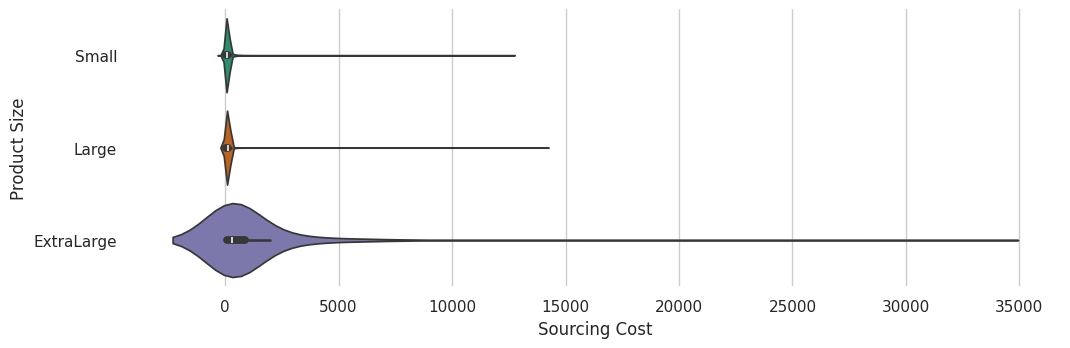

In [268]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_df['Product Size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_df, x='Sourcing Cost', y='Product Size', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

##Distribution of Quantity

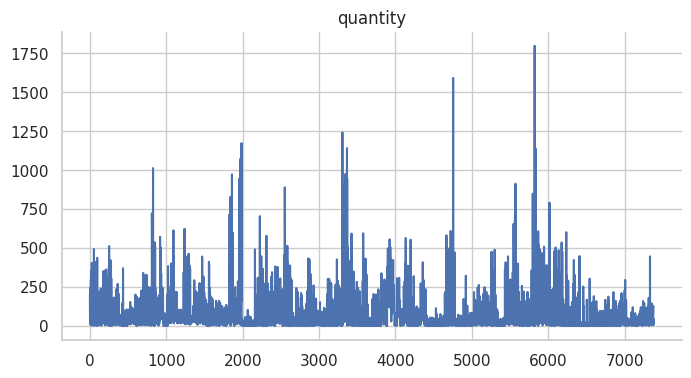

In [269]:
from matplotlib import pyplot as plt
new_df['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

##Distribution of Quantity with Sourcing Cost

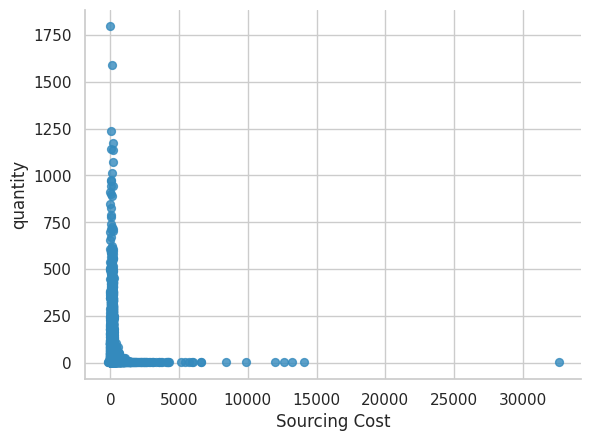

In [270]:
from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='Sourcing Cost', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [271]:
len(new_df)

7380

##Encoding Categorical Column

In [272]:
df_train_new=label_encode_categorical_columns(new_df,categorical_columns)

In [273]:
df_train_new.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,quantity
0,0,0,0,0,2,1,0,57.06,201
1,0,0,0,0,2,1,0,97.66,60
2,0,0,0,0,2,1,0,106.69,14
3,0,0,0,0,2,1,0,111.73,181
4,0,0,0,0,2,1,0,112.73,53


##Histogram of Manufacturer

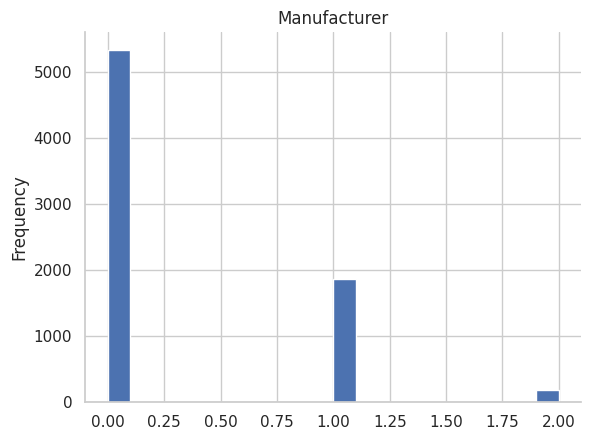

In [274]:
from matplotlib import pyplot as plt
df_train_new['Manufacturer'].plot(kind='hist', bins=20, title='Manufacturer')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Histogram of Product Type

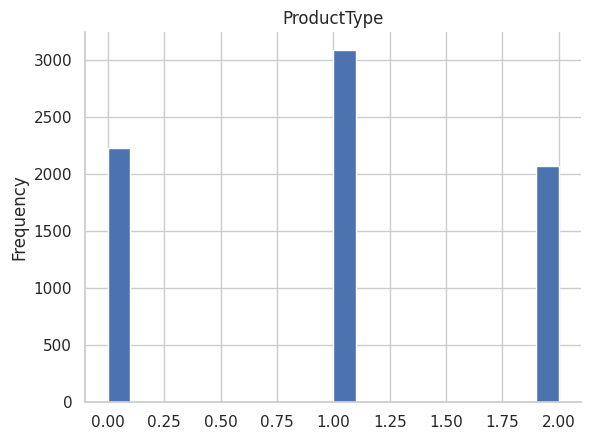

In [275]:
from matplotlib import pyplot as plt
df_train_new['ProductType'].plot(kind='hist', bins=20, title='ProductType')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Distribution of ProductType(which is different from the above)

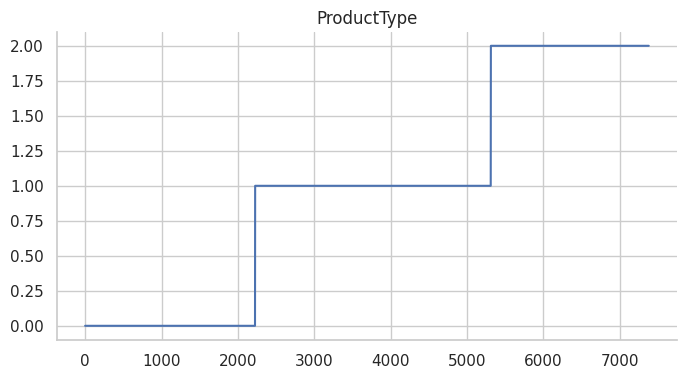

In [276]:
from matplotlib import pyplot as plt
df_train_new['ProductType'].plot(kind='line', figsize=(8, 4), title='ProductType')
plt.gca().spines[['top', 'right']].set_visible(False)

##Distribution of Area Code

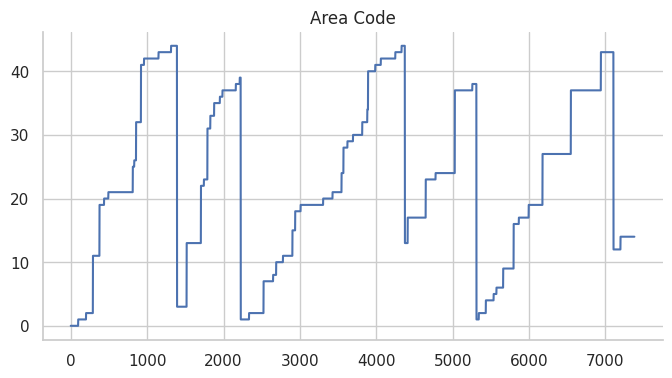

In [277]:
from matplotlib import pyplot as plt
df_train_new['Area Code'].plot(kind='line', figsize=(8, 4), title='Area Code')
plt.gca().spines[['top', 'right']].set_visible(False)

##Calculating the Overall Cost

In [278]:
import pandas as pd

# Assuming result_df is your DataFrame containing the "quantity" and "Sourcing Cost" columns
df_train_new['cost'] = df_train_new['Sourcing Cost'] * df_train_new['quantity']  # Create the new 'cost' column
df_train_new = df_train_new.drop(columns=['Sourcing Cost'])  # Drop the 'Sourcing Cost' column

df_train_new.head()


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,quantity,cost
0,0,0,0,0,2,1,0,201,11469.06
1,0,0,0,0,2,1,0,60,5859.60
2,0,0,0,0,2,1,0,14,1493.66
3,0,0,0,0,2,1,0,181,20223.13
4,0,0,0,0,2,1,0,53,5974.69


##Normalise the Numeric Columns

In [281]:
scaler = MinMaxScaler()
df_train_new[["cost","quantity"]] = scaler.fit_transform(df_train_new[["cost","quantity"]])
df_train_new.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,quantity,cost
0,0,0,0,0,2,1,0,0.111421,0.058321
1,0,0,0,0,2,1,0,0.032869,0.034667
2,0,0,0,0,2,1,0,0.007242,0.016257
3,0,0,0,0,2,1,0,0.100279,0.095235
4,0,0,0,0,2,1,0,0.028969,0.035152


##Spliting the dataset into train and test set

In [282]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_train_new.drop(["cost"],axis=1), df_train_new["cost"], test_size=0.2, random_state=42)

##Applying Liner Regression, Decision Tree, Random Forest and Xgboost Model

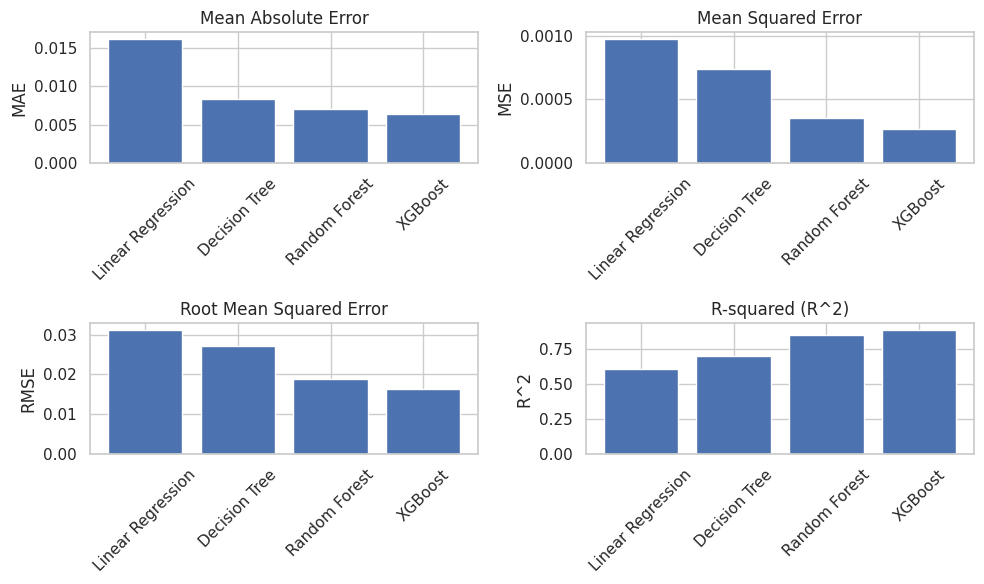

In [285]:
# Initialize models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()

# Fit models
linear_reg.fit(X_train_new, y_train_new)
decision_tree.fit(X_train_new, y_train_new)
random_forest.fit(X_train_new, y_train_new)
xgboost.fit(X_train_new, y_train_new)

# Make predictions
y_pred_linear_reg = linear_reg.predict(X_test_new)
y_pred_decision_tree = decision_tree.predict(X_test_new)
y_pred_random_forest = random_forest.predict(X_test_new)
y_pred_xgboost = xgboost.predict(X_test_new)

# Calculate error metrics
def calculate_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_linear_reg, mse_linear_reg, rmse_linear_reg, r2_linear_reg = calculate_error_metrics(y_test_new, y_pred_linear_reg)
mae_decision_tree, mse_decision_tree, rmse_decision_tree, r2_decision_tree = calculate_error_metrics(y_test_new, y_pred_decision_tree)
mae_random_forest, mse_random_forest, rmse_random_forest, r2_random_forest = calculate_error_metrics(y_test_new, y_pred_random_forest)
mae_xgboost, mse_xgboost, rmse_xgboost, r2_xgboost = calculate_error_metrics(y_test_new, y_pred_xgboost)

# Plot evaluation metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_values = [mae_linear_reg, mae_decision_tree, mae_random_forest, mae_xgboost]
mse_values = [mse_linear_reg, mse_decision_tree, mse_random_forest, mse_xgboost]
rmse_values = [rmse_linear_reg, rmse_decision_tree, rmse_random_forest, rmse_xgboost]
r2_values = [r2_linear_reg, r2_decision_tree, r2_random_forest, r2_xgboost]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, mae_values)
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(models, mse_values)
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(models, rmse_values)
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(models, r2_values)
plt.title('R-squared (R^2)')
plt.ylabel('R^2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [286]:
r2_values

[0.6074976371579073,
 0.7052409683504582,
 0.8575350937334174,
 0.8936233589229323]

##Analysis of Approach-2
Models Applied:


*   Linear Regression

*   Decision Tree
*   Random Forest


*   Xgboost

in this finally or dataset has around 7500 rows and a new column of quantity so when we applied the above models on the dataset we got a **R2 score of 60% for Linear Regression, 70% for Decision Tree, 85% for Random Forest and 89% for Xgboost** hence we can say that Xgboost is a better performing model. Here Xgboost performs better because of the **gradient boosting method when it combines the weak learning model** like decision trees together then it is able to capture a nonlinear and complex patterns and **due to it's built in regularization it does not overfit** resulting in a better performance. Futher in future i can also try other **deep learning models like GRUs, LSTM Bi-LSTM** etc.